In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
app_data = pd.read_csv('App Usage dataset for 10000 customers.csv')
app_data.head()

,Duration Used (days),Total Usage (minutes),Reason for Quitting,Cost Offered (rupees),Accepted Offer
0,141,3186,Expensive,600,True
1,154,9717,Not Useful,800,True
2,306,17820,Not Useful,500,True
3,338,28135,Expensive,500,True
4,57,5448,Expensive,800,True


In [3]:
# Check for missing values
print("\nMissing values in each column:")
print(app_data.isnull().sum())


Missing values in each column:
Duration Used (days)     0
Total Usage (minutes)    0
Reason for Quitting      0
Cost Offered (rupees)    0
Accepted Offer           0
dtype: int64


In [5]:
app_data.describe()

,Duration Used (days),Total Usage (minutes),Cost Offered (rupees)
count,10000.000000,10000.000000,10000.000000
mean,182.427000,10933.038700,701.590000
std,105.569033,7964.150847,141.415953
min,1.000000,27.000000,500.000000
25%,90.000000,4459.750000,600.000000
50%,183.000000,9274.000000,700.000000
75%,274.000000,15929.000000,800.000000
max,365.000000,35952.000000,900.000000


In [6]:
# Convert boolean to numeric for easier analysis
app_data['Accepted Offer'] = app_data['Accepted Offer'].map({True: 1, False: 0})

# Create derived features for analysis
app_data['Daily Usage (minutes)'] = app_data['Total Usage (minutes)'] / app_data['Duration Used (days)']

# Create usage segments for better analysis
app_data['Usage Segment'] = pd.qcut(app_data['Total Usage (minutes)'], q=4,
                             labels=['Low', 'Medium', 'High', 'Very High'])
app_data['Duration Segment'] = pd.qcut(app_data['Duration Used (days)'], q=4,
                                labels=['Short', 'Medium', 'Long', 'Very Long'])

# Display the updated dataframe
app_data.head()

,Duration Used (days),Total Usage (minutes),Reason for Quitting,Cost Offered (rupees),Accepted Offer,Daily Usage (minutes),Usage Segment,Duration Segment
0,141,3186,Expensive,600,1,22.595745,Low,Medium
1,154,9717,Not Useful,800,1,63.097403,High,Medium
2,306,17820,Not Useful,500,1,58.235294,Very High,Very Long
3,338,28135,Expensive,500,1,83.239645,Very High,Very Long
4,57,5448,Expensive,800,1,95.578947,Medium,Short


In [8]:
app_data.groupby('Reason for Quitting')['Cost Offered (rupees)'].mean()


Reason for Quitting
Expensive     702.814402
Not Useful    703.209877
Others        694.936709
Unhappy       701.165113
Name: Cost Offered (rupees), dtype: float64

In [10]:
app_data.groupby('Reason for Quitting')['Total Usage (minutes)'].mean()

Reason for Quitting
Expensive     11011.598884
Not Useful    10955.061728
Others        10883.098345
Unhappy       10832.123502
Name: Total Usage (minutes), dtype: float64

### Visualizing box plots for numeric columns

### Analyzing the relationships between the categorical columns -> Reason for quitting and Accepted Offer

In [11]:
app_data['Reason for Quitting'].value_counts()

Reason for Quitting
Expensive     3944
Unhappy       3004
Not Useful    2025
Others        1027
Name: count, dtype: int64

In [12]:
app_data['Accepted Offer'].value_counts()

Accepted Offer
1    6416
0    3584
Name: count, dtype: int64

In [13]:
pd.crosstab(app_data['Reason for Quitting'], app_data['Accepted Offer'])

Accepted Offer,0,1
Reason for Quitting,,
Expensive,1418,2526
Not Useful,708,1317
Others,349,678
Unhappy,1109,1895


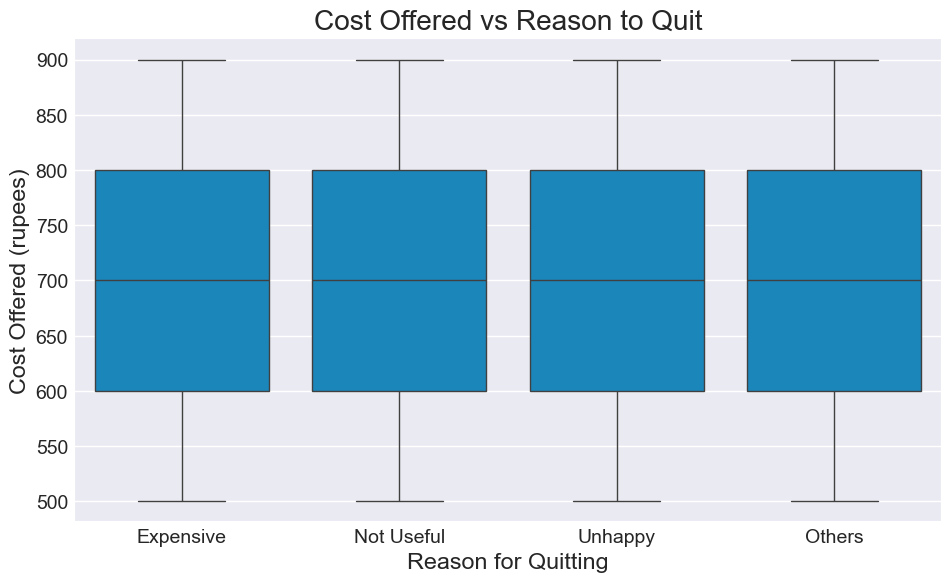

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(x= app_data['Reason for Quitting'], y = app_data['Cost Offered (rupees)'])
plt.title('Cost Offered vs Reason to Quit')
plt.show()

In [15]:
app_data.head()

,Duration Used (days),Total Usage (minutes),Reason for Quitting,Cost Offered (rupees),Accepted Offer,Daily Usage (minutes),Usage Segment,Duration Segment
0,141,3186,Expensive,600,1,22.595745,Low,Medium
1,154,9717,Not Useful,800,1,63.097403,High,Medium
2,306,17820,Not Useful,500,1,58.235294,Very High,Very Long
3,338,28135,Expensive,500,1,83.239645,Very High,Very Long
4,57,5448,Expensive,800,1,95.578947,Medium,Short


In [17]:
import warnings 
warnings.filterwarnings('ignore')
acceptance_rate = app_data.groupby(['Usage Segment', 'Duration Segment'])['Accepted Offer'].mean() * 100
print(acceptance_rate)


Usage Segment  Duration Segment
Low            Short               63.645468
               Medium              65.625000
               Long                52.173913
               Very Long                 NaN
Medium         Short               65.686275
               Medium              62.915129
               Long                64.820847
               Very Long           62.457338
High           Short                     NaN
               Medium              62.514156
               Long                63.233780
               Very Long           65.996909
Very High      Short                     NaN
               Medium              57.446809
               Long                65.464481
               Very Long           65.169271
Name: Accepted Offer, dtype: float64


In [18]:
#Statistical summary for reason of quitting

quit_reason_stats = app_data.groupby('Reason for Quitting')[['Duration Used (days)', 'Total Usage (minutes)']].describe()

quit_reason_stats

Duration Used (days)                                      \
                                   count        mean         std  min    25%   
Reason for Quitting                                                            
Expensive                         3944.0  182.452840  104.676204  1.0  91.75   
Not Useful                        2025.0  181.420247  106.916315  1.0  88.00   
Others                            1027.0  181.058423  105.049642  1.0  89.50   
Unhappy                           3004.0  183.539614  106.039089  1.0  88.00   

                                          Total Usage (minutes)                \
                       50%     75%    max                 count          mean   
Reason for Quitting                                                             
Expensive            183.0  271.25  365.0                3944.0  11011.598884   
Not Useful           182.0  275.00  365.0                2025.0  10955.061728   
Others               184.0  269.50  365.0                1027.0  10883.098345   
Unhappy              185.0  276.00  365.0                3004.0  10832.123502   

                                                                            
                             std   min      25%     50%       75%      max  
Reason for Quitting                                                         
Expensive            7978.889863  33.0  4534.50  9303.0  16092.50  34972.0  
Not Useful           7979.553593  45.0  4411.00  9274.0  16010.00  35841.0  
Others               7771.611020  57.0  4623.50  9630.0  15464.00  33805.0  
Unhappy              8002.042023  27.0  4321.25  9076.5  15811.25  35952.0

In [19]:
#App offer acceptance rate by reason for quitting
print("\nOffer Acceptance Rate by Reason for Quitting:")
acceptance_by_reason = app_data.groupby('Reason for Quitting')['Accepted Offer'].mean().sort_values(ascending=False)
print(acceptance_by_reason * 100)


Offer Acceptance Rate by Reason for Quitting:
Reason for Quitting
Others        66.017527
Not Useful    65.037037
Expensive     64.046653
Unhappy       63.082557
Name: Accepted Offer, dtype: float64


In [20]:
#Offer Acceptance rate by cost
print("\nOffer Acceptance Rate by Cost Offered:")
acceptance_by_cost = app_data.groupby('Cost Offered (rupees)')['Accepted Offer'].mean().sort_values(ascending=False)
print(acceptance_by_cost * 100) 


Offer Acceptance Rate by Cost Offered:
Cost Offered (rupees)
600    80.794369
500    80.530071
800    60.292634
700    59.198813
900    40.929095
Name: Accepted Offer, dtype: float64


In [21]:
# Cross-tabulation of reason and cost
print("\nAcceptance Rate by Reason and Cost:")
reason_cost_pivot = app_data.pivot_table(values='Accepted Offer',
                                index='Reason for Quitting',
                                columns='Cost Offered (rupees)',
                                aggfunc='mean')
print(reason_cost_pivot * 100)


Acceptance Rate by Reason and Cost:
Cost Offered (rupees)        500        600        700        800        900
Reason for Quitting                                                         
Expensive              78.853503  83.355526  59.825871  60.051546  40.338164
Not Useful             83.950617  81.770833  60.651629  60.240964  40.521327
Others                 82.038835  79.090909  61.244019  62.254902  42.553191
Unhappy                79.858657  77.760252  56.721311  59.965928  41.515651


In [22]:
#Setting visualization styles
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

### Visualization of the numeric fields distribution

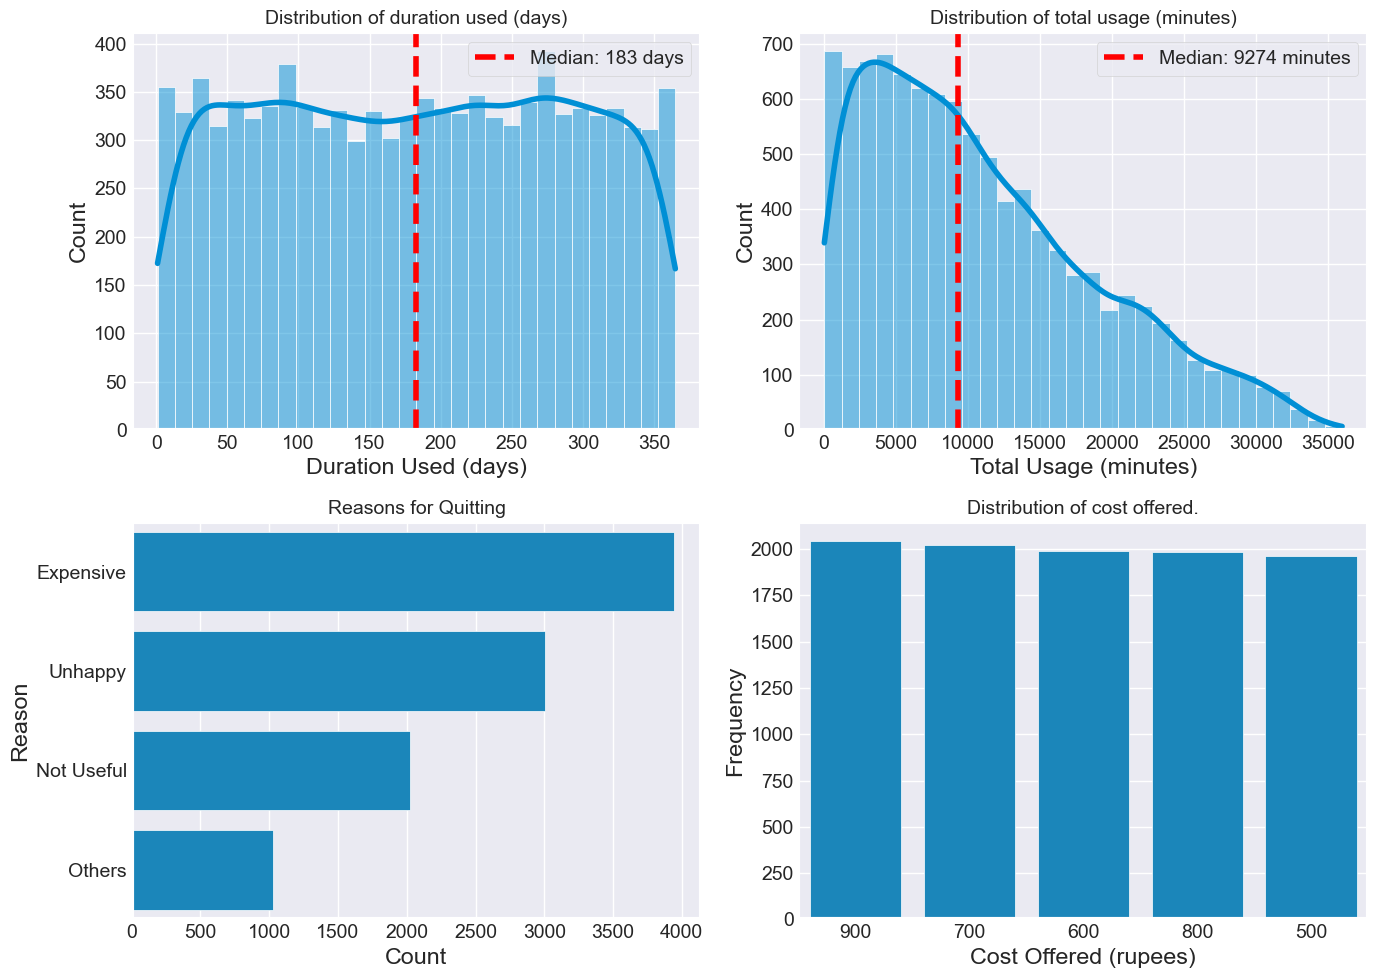

In [23]:
plt.figure(figsize=(14,10))


#Duration used distribution visualization

plt.subplot(2,2,1)
sns.histplot(app_data['Duration Used (days)'], kde=True, bins=30)
plt.title('Distribution of duration used (days)', fontsize=14)
plt.axvline(app_data['Duration Used (days)'].median(), color = 'red', linestyle = '--', label = f'Median: {app_data['Duration Used (days)'].median():.0f} days')
plt.legend()

#Total usage in minutes distribution

plt.subplot(2,2,2)
sns.histplot(app_data['Total Usage (minutes)'], kde=True, bins=30)
plt.title('Distribution of total usage (minutes)', fontsize=14)
plt.axvline(app_data['Total Usage (minutes)'].median(), color = 'red', linestyle = '--', label = f'Median: {app_data['Total Usage (minutes)'].median():.0f} minutes')
plt.legend()


#Distribution of reasons for quitting

plt.subplot(2,2,3)
reason_order = app_data['Reason for Quitting'].value_counts().index
sns.countplot(y='Reason for Quitting', data=app_data, order=reason_order)
plt.title('Reasons for Quitting', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Reason')


#Cost offered Distribution

plt.subplot(2,2,4)
cost_order = app_data['Cost Offered (rupees)'].value_counts().index
sns.countplot(x='Cost Offered (rupees)', data=app_data, order=cost_order)
plt.title('Distribution of cost offered.', fontsize=14)
plt.xlabel('Cost Offered (rupees)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
          

### Plotting relationships between different fields.

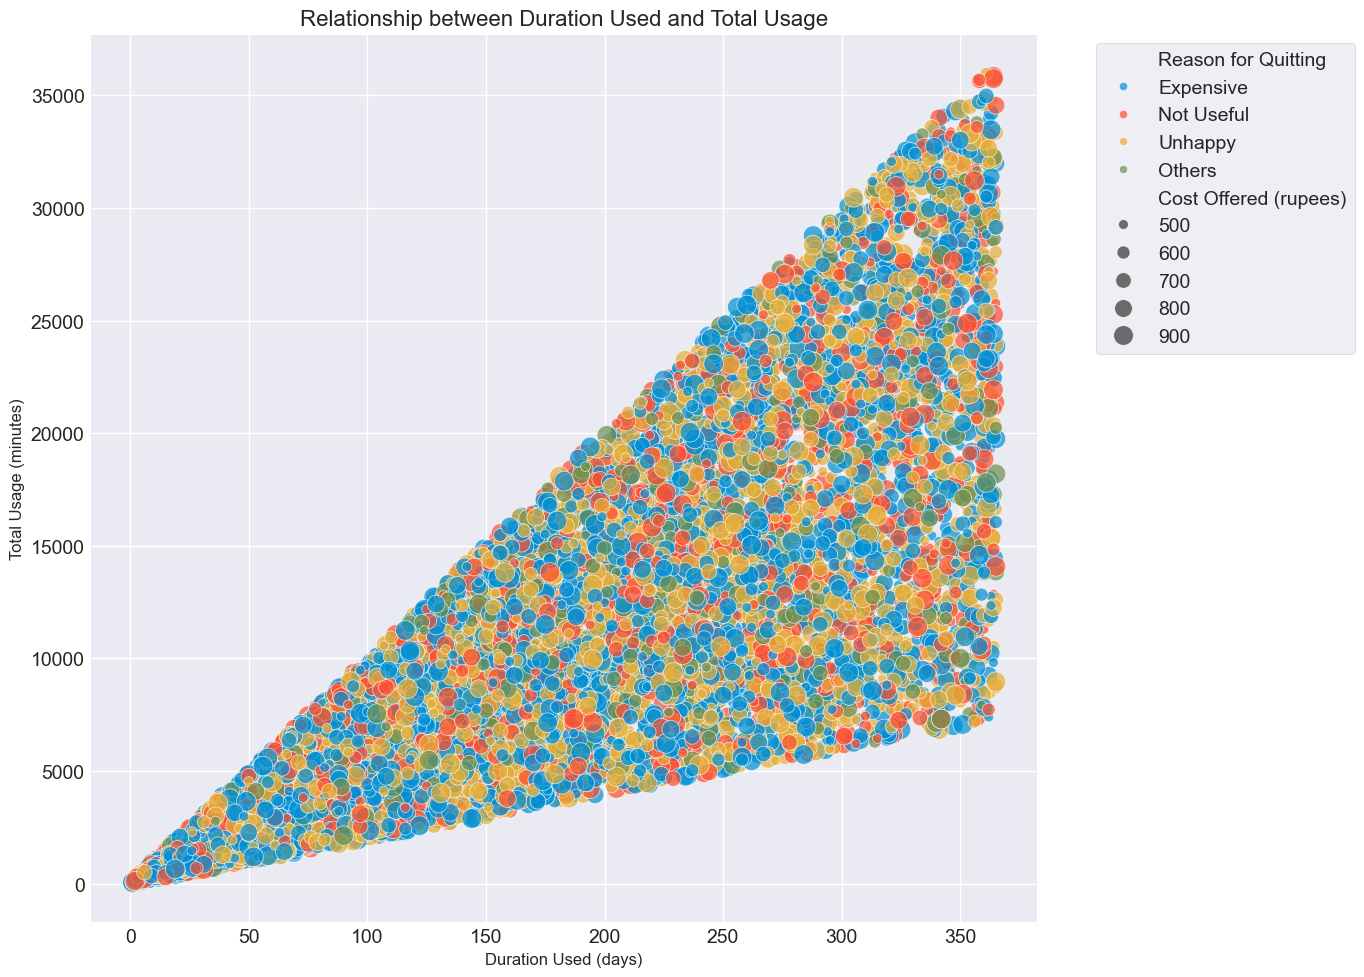

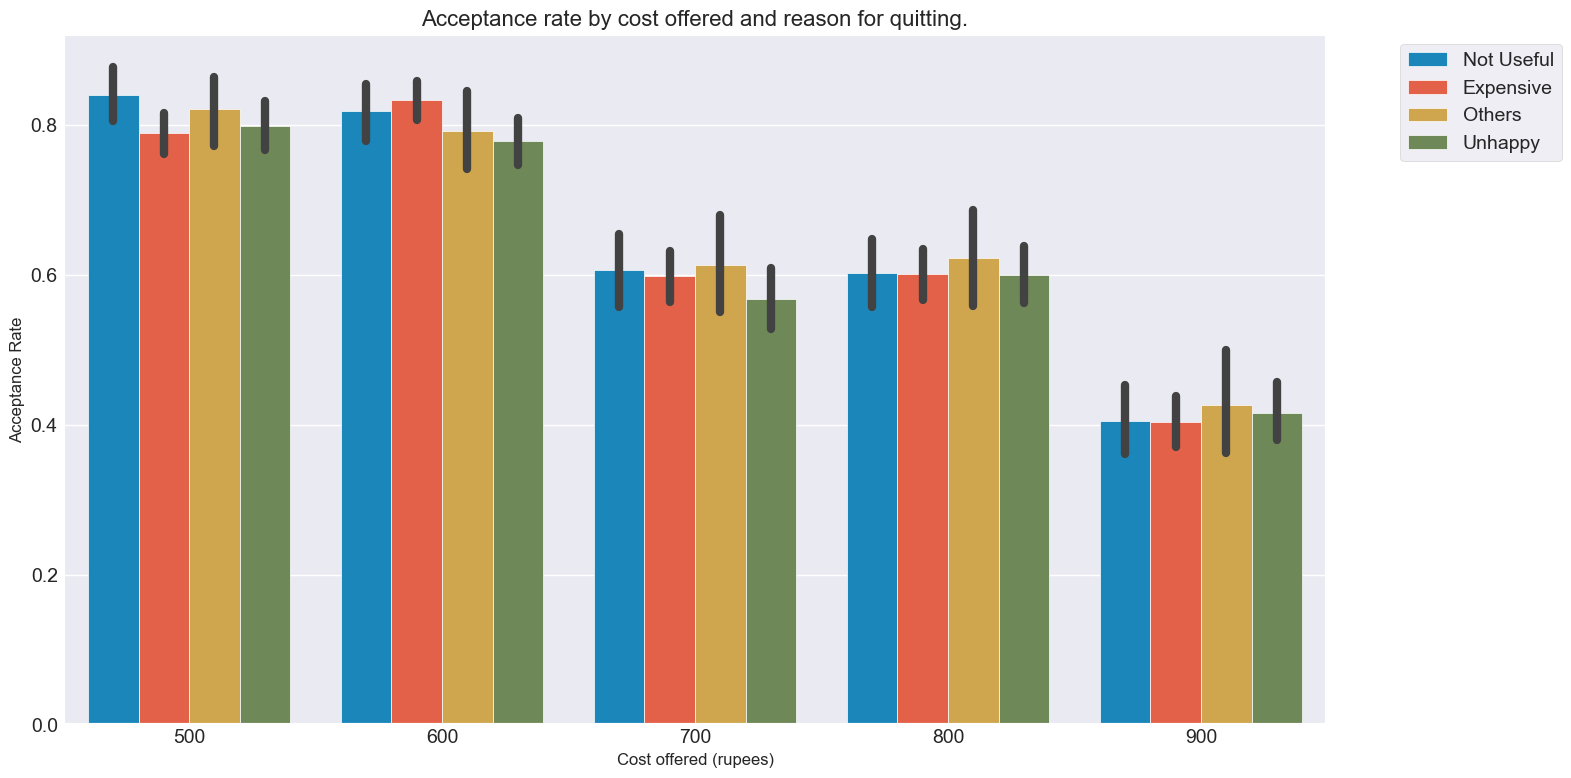

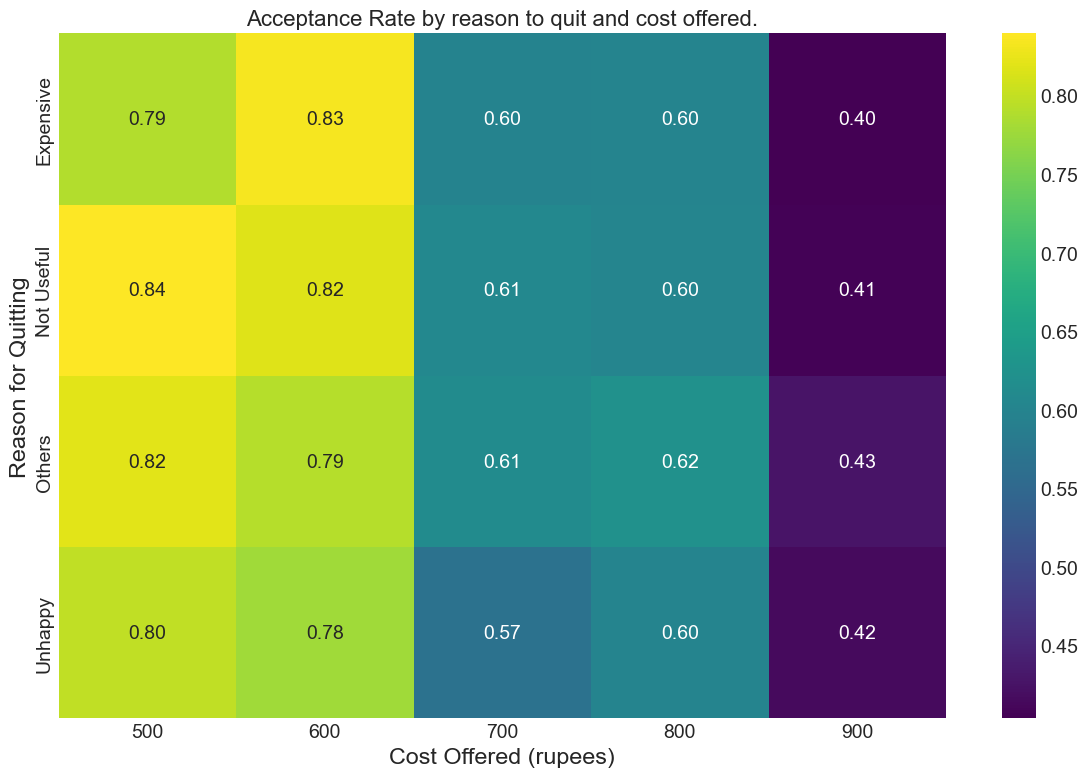

In [24]:
#Duration and total usage relationship

plt.figure(figsize=(14,10))
sns.scatterplot(x='Duration Used (days)',
                y='Total Usage (minutes)',
                hue='Reason for Quitting',
                size='Cost Offered (rupees)',
                sizes=(50,200),
                alpha=0.7,
                data=app_data)
plt.title('Relationship between Duration Used and Total Usage', fontsize=16)
plt.xlabel('Duration Used (days)', fontsize=12)
plt.ylabel('Total Usage (minutes)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Acceptance rate by cost and reason
plt.figure(figsize=(16,8))
sns.barplot(x='Cost Offered (rupees)',
            y='Accepted Offer',
            hue='Reason for Quitting',
            data= app_data)
plt.title('Acceptance rate by cost offered and reason for quitting.', fontsize=16)
plt.xlabel('Cost offered (rupees)', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#Heatmap for acceptance rate by reason for quitting and cost offered
plt.figure(figsize=(12,8))
reason_cost_pivot = app_data.pivot_table(values='Accepted Offer',
                                         index='Reason for Quitting',
                                         columns='Cost Offered (rupees)',
                                         aggfunc='mean')
sns.heatmap(reason_cost_pivot, annot=True, fmt='.2f', cmap= 'viridis')
plt.title('Acceptance Rate by reason to quit and cost offered.', fontsize=16)
plt.tight_layout()
plt.show()

In [33]:
app_data.head()

,Duration Used (days),Total Usage (minutes),Reason for Quitting,Cost Offered (rupees),Accepted Offer,Usage Per Day (in minutes)
0,141,3186,Expensive,600,True,22.60
1,154,9717,Not Useful,800,True,63.10
2,306,17820,Not Useful,500,True,58.24
3,338,28135,Expensive,500,True,83.24
4,57,5448,Expensive,800,True,95.58


### Visualizing usage and acceptance by segments

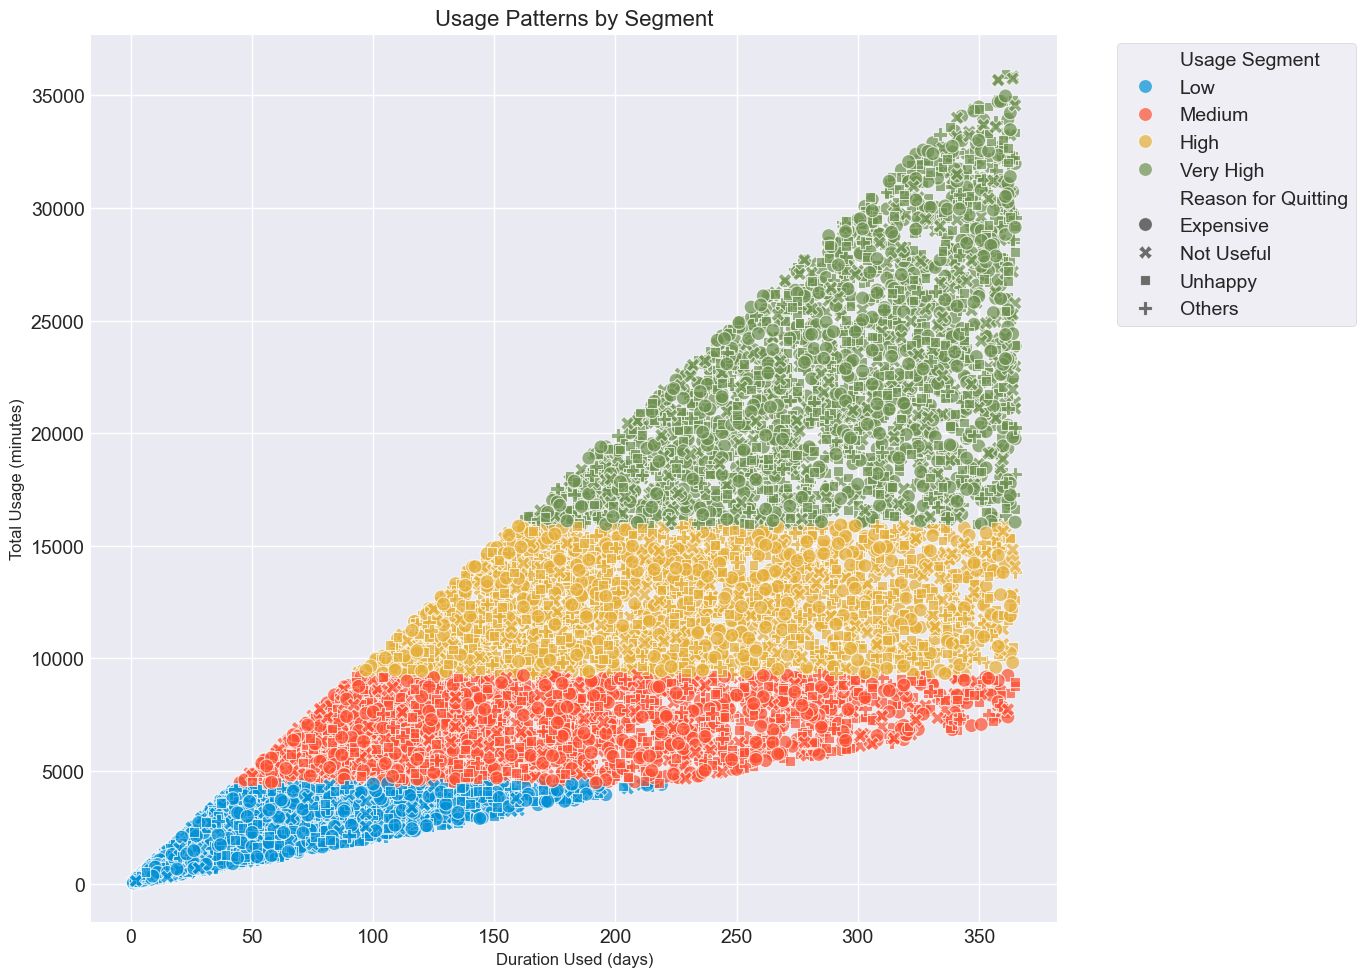

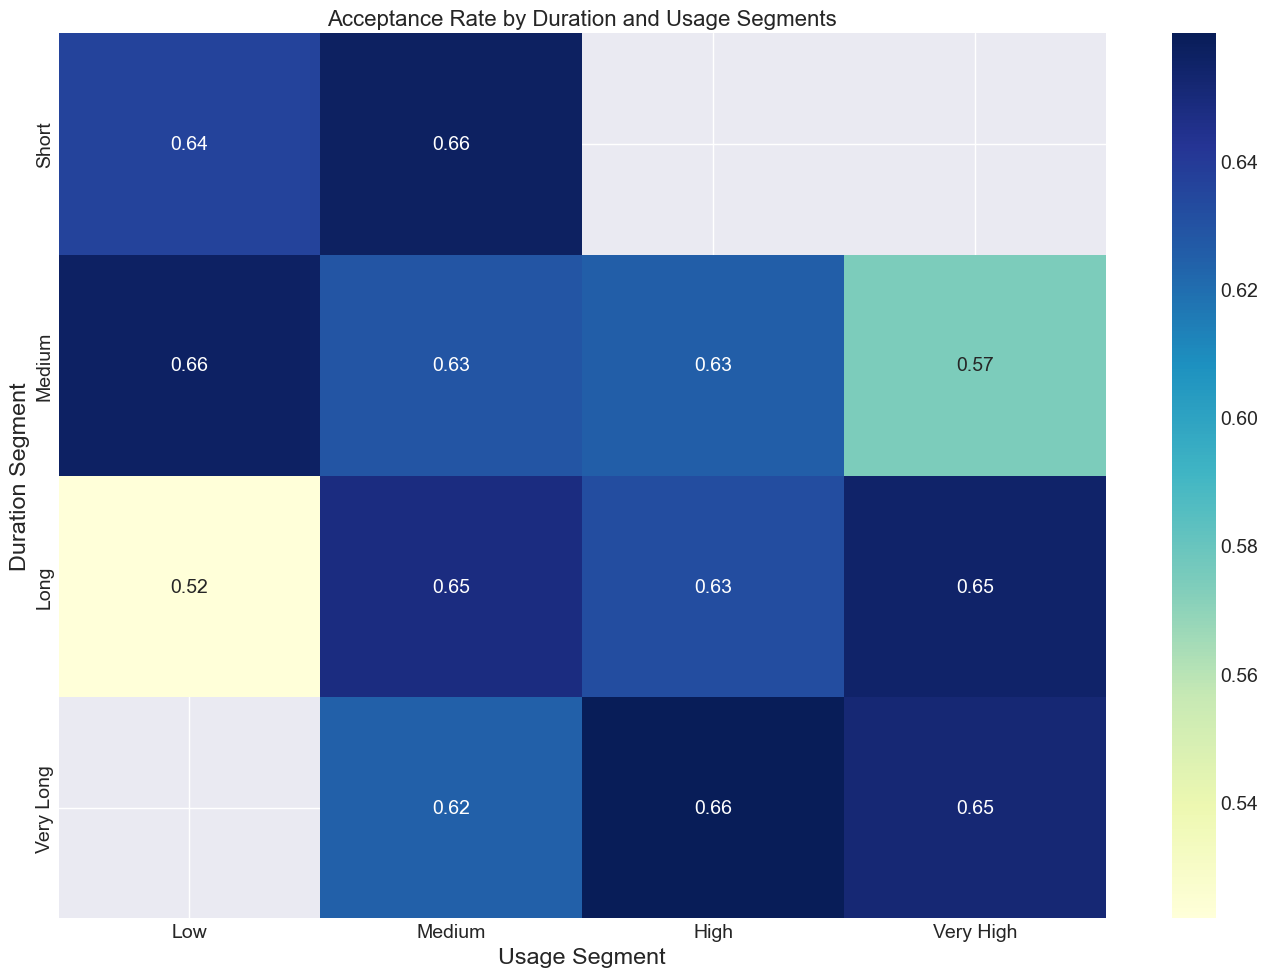

In [25]:
#Usage pattern by segments
plt.figure(figsize=(14,10))
sns.scatterplot(x='Duration Used (days)',
                y='Total Usage (minutes)',
                hue='Usage Segment',
                style='Reason for Quitting',
                s=100,
                alpha=0.7,
                data=app_data)
plt.title('Usage Patterns by Segment', fontsize=16)
plt.xlabel('Duration Used (days)', fontsize=12)
plt.ylabel('Total Usage (minutes)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Acceptance Offer by segments
plt.figure(figsize=(14,10))
segment_pivot = app_data.pivot_table(values='Accepted Offer',
                                index='Duration Segment',
                                columns='Usage Segment',
                                aggfunc='mean')
sns.heatmap(segment_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Acceptance Rate by Duration and Usage Segments', fontsize=16)
plt.tight_layout()
plt.show()

### Detailed and 3D visualization of key metrics

In [27]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels

In [28]:
#Interactive box plots for usage by reason

fig = px.box(app_data, x='Reason for Quitting', y='Total Usage (minutes)',
color='Reason for Quitting',
title='Usage Distribution by Reason for Quitting')
fig.update_layout(height=600, width=900)
fig.show()

#3D Visualization of key metrics
fig = px.scatter_3d(app_data, x='Duration Used (days)', y='Total Usage (minutes)', z='Cost Offered (rupees)', color='Reason for Quitting',
                    symbol='Accepted Offer', opacity=0.7, title='3D View of Key Metrics.')
fig.update_layout(height=800, width=1000)
fig.show()

### Building a random forest classifier model for predicted acceptance.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [30]:
#Preparing features and target variables

X = app_data[['Duration Used (days)', 'Total Usage (minutes)', 'Cost Offered (rupees)']]
y = app_data['Accepted Offer']

#One-hot encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
reason_encoded = encoder.fit_transform(app_data[['Reason for Quitting']])

#Create feature names for the encoded columns
reason_features = encoder.get_feature_names_out(['Reason for Quitting'])
reason_encoded_app_data = pd.DataFrame(reason_encoded, columns=reason_features)

#Combining with numerical features
X = pd.concat([X.reset_index(drop=True), reason_encoded_app_data], axis=1)

#Scaling the numeric features
scaler = StandardScaler()
numeric_features = ['Duration Used (days)', 'Total Usage (minutes)', 'Cost Offered (rupees)']
X[numeric_features] = scaler.fit_transform(X[numeric_features])

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Training the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



                                       

RandomForestClassifier(random_state=42)

In [31]:
# Evaluate the model
y_pred = model.predict(X_test)
print("Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:

Confusion Matrix:
[[ 360  517]
 [ 438 1185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.41      0.43       877
           1       0.70      0.73      0.71      1623

    accuracy                           0.62      2500
   macro avg       0.57      0.57      0.57      2500
weighted avg       0.61      0.62      0.61      2500



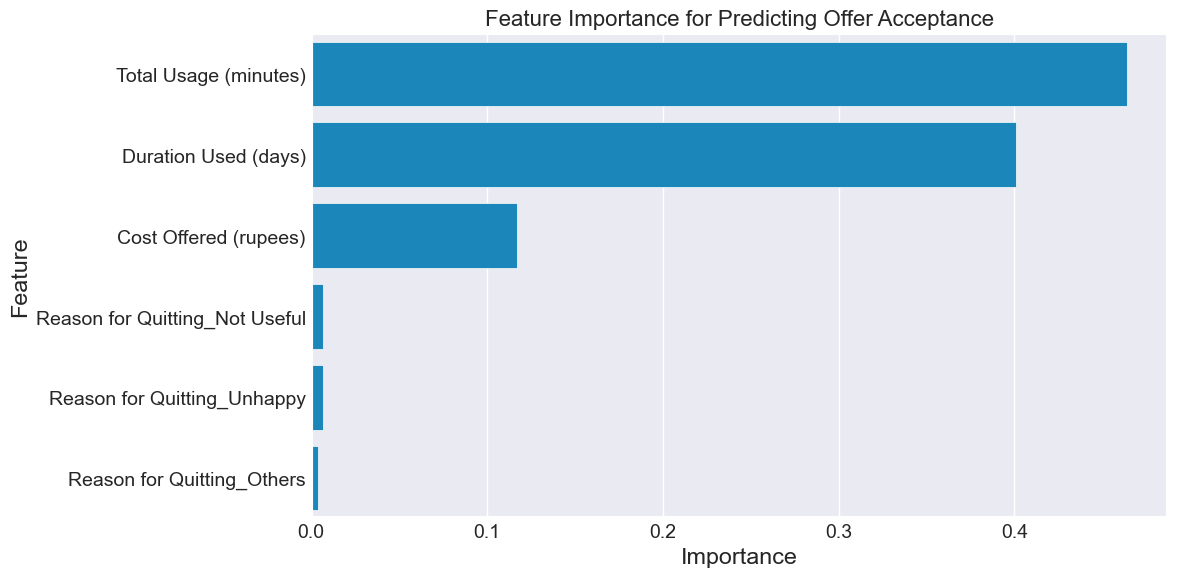

In [32]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Predicting Offer Acceptance', fontsize=16)
plt.tight_layout()
plt.show()

### Applying Kmeans clustering to better know the groupings.

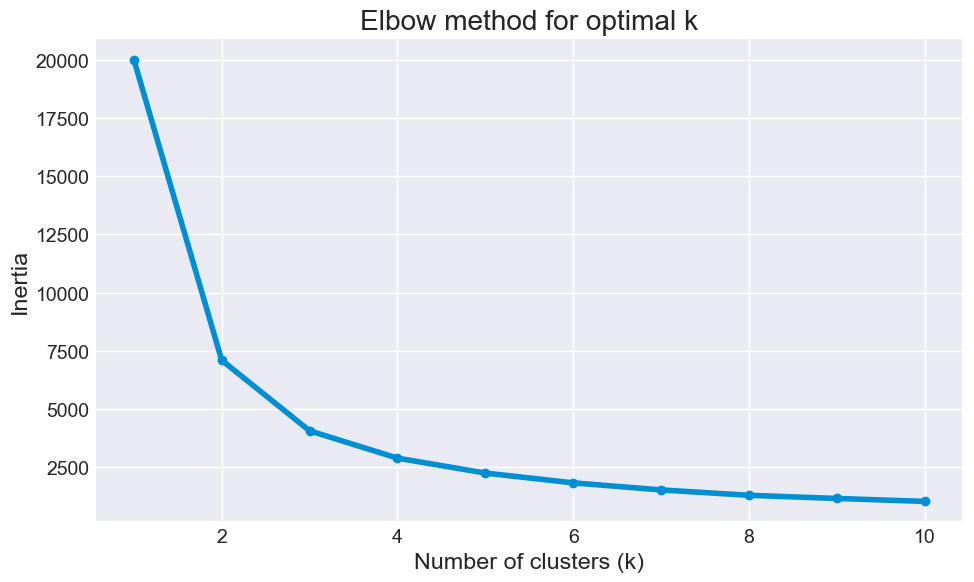

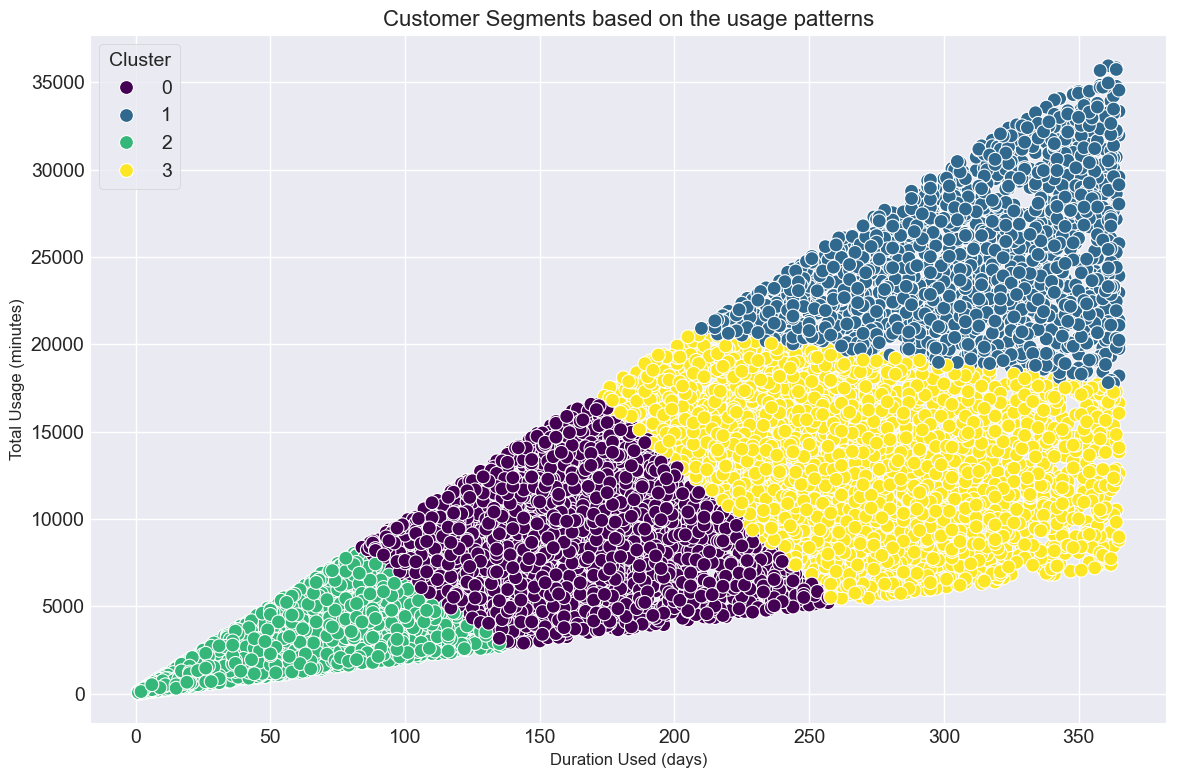

Cluster Analysis:
   Cluster  Duration Used (days)  Total Usage (minutes)  Accepted Offer  \
0        0            159.661255            8798.158730        0.639610   
1        1            308.220958           24695.483832        0.653293   
2        2             54.555857            2874.909677        0.639389   
3        3            270.299656           13484.050517        0.638729   

  Reason for Quitting  
0           Expensive  
1           Expensive  
2           Expensive  
3           Expensive  


In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Preparing data for performing clustering

cluster_data = app_data[['Duration Used (days)', 'Total Usage (minutes)']]
cluster_data_scaled = StandardScaler().fit_transform(cluster_data)

#Determining total number of clusters using Elbow method

inertia = []
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

#Plotting the elbow results
plt.figure(figsize=(10,6))
plt.plot(k_range, inertia, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.grid(True)
plt.show()


#Applying K-means with optimal number of clusters. e.g. = 4

kmeans = KMeans(n_clusters=4, random_state=42)
app_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

#Visualizing the clusters

plt.figure(figsize=(12,8))
sns.scatterplot(x='Duration Used (days)', y='Total Usage (minutes)', hue='Cluster', palette='viridis', s=100, data=app_data)
plt.title('Customer Segments based on the usage patterns', fontsize=16)
plt.xlabel('Duration Used (days)', fontsize=12)
plt.ylabel('Total Usage (minutes)', fontsize=12)
plt.tight_layout()
plt.show()


#Analyzing the clustering

cluster_analysis = app_data.groupby('Cluster').agg({'Duration Used (days)' : 'mean',
                                                    'Total Usage (minutes)' : 'mean',
                                                    'Accepted Offer' : 'mean',
                                                    'Reason for Quitting' : lambda x: x.value_counts().index[0] #Most common reason
                                                   }).reset_index()

print('Cluster Analysis:')
print(cluster_analysis)

fig = make_subplots(rows=1, cols=2, subplot_titles=('Average Duration by Cluster', 'Average Usage by Cluster'))

fig.add_trace(
    go.Bar(x=cluster_analysis['Cluster'], y=cluster_analysis['Duration Used (days)'], name = 'Duration Used (days)'),
    row=1, col=1 )

fig.add_trace(
    go.Bar(x=cluster_analysis['Cluster'], y=cluster_analysis['Total Usage (minutes)'], name = 'Total Usage (minutes)'), 
              row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Cluster Characteristics")
fig.show()




### Calculating metrics for insights

In [34]:
avg_duration = app_data['Duration Used (days)'].mean()
median_duration = app_data['Duration Used (days)'].median()
avg_usage = app_data['Total Usage (minutes)'].mean()
median_usage = app_data['Total Usage (minutes)'].median()
overall_acceptance = app_data['Accepted Offer'].mean() * 100


#Analyzing high-value users

high_value_users = app_data[(app_data['Usage Segment'] == 'Very High') & (app_data['Duration Segment'] == 'Very Long')]
early_churners = app_data[app_data['Duration Used (days)']<90] #customers quitting before 3 months

print('******--KEY INSIGHTS--******')
print(f"Average app usage duration: {avg_duration:.2f} days (median: {median_duration:.2f})")
print(f"Average total usage: {avg_usage:.2f} minutes (median: {median_usage:.2f})")

print('\nPrimary reasons for quitting:')
reason_counts = app_data['Reason for Quitting'].value_counts(normalize=True)*100
for reason, percentage in reason_counts.items():
    print(f'- {reason} : {percentage:.1f}%')

print(f'\nOverall offer acceptance ratio : {overall_acceptance:.1f}%')

print('\nAcceptance rate by cost offered:')
for cost, rate in acceptance_by_cost.items():
    print(f'- Rs.{cost}: {rate*100:.1f}%')

print('\nPrimary reasons for Early Churners (<90 days)')
early_reasons = early_churners['Reason for Quitting'].value_counts(normalize=True)*100
for reason, percentage in early_reasons.items():
    print(f'- {reason}: {percentage:.1f}%')

print("\nReasons for high-value users:")
high_value_reasons = high_value_users['Reason for Quitting'].value_counts(normalize=True)*100
for reason, percentage in high_value_reasons.items():
    print(f"- {reason}: {percentage:.1f}%")

def dynamic_recommendations(app_data):
    "Generate BI recommendations based on actual insights from the data analysis."
    recommendations = {
        'pricing' : [],
        'retention' : [],
        'early_experience' : [],
        'segmentation' : []
    }

    #-------Pricing Strategy Recommendations-------
    #Calculating percentages for users who cited expensive as a reason
    expensive_pct = app_data[app_data['Reason for Quitting'] == 'Expensive'].shape[0] / app_data.shape[0] * 100
    
    # Identify high-value users (top quartile in duration and usage)
    high_usage = app_data[app_data['Total Usage (minutes)'] > app_data['Total Usage (minutes)'].quantile(0.75)]
    high_duration = app_data[app_data['Duration Used (days)'] > app_data['Duration Used (days)'].quantile(0.75)]
    power_users = pd.merge(high_usage, high_duration, how='inner')

    high_value_expensive = power_users[power_users['Reason for Quitting'] == 'Expensive'].shape[0] / power_users.shape[0] * 100

    #Determing the most effective pricing.
    cost_acceptance = app_data.groupby('Cost Offered (rupees)')['Accepted Offer'].mean()
    optimal_cost = cost_acceptance.idxmax()

    recommendations['pricing'].append(f'Implement tiered pricing model as {expensive_pct:.1f}% of users cite cost as the primary reason for leaving.')
    if high_value_expensive > 40:
        recommendations['pricing'].append(f'Offer loyalty discounts for users with longer durations as {high_value_expensive:.1f}% of power users leave due to cost.')

    recommendations['pricing'].append(f'Consider special pricing for high-value segments with optimal offers around Rs.{optimal_cost}')

    #-----Retention Campaign Recommendations-----
    #-----Analyzing acceptance rates by reason and cost
    reason_cost_pivot = app_data.pivot_table(
    values='Accepted Offer',
    index='Reason for Quitting',
    columns='Cost Offered (rupees)',
    aggfunc='mean'
)

    #Finding optimal retention strategy for each reason
    for reason in ['Expensive', 'Not Useful', 'Unhappy']:
        if reason in reason_cost_pivot.index:
            best_cost = reason_cost_pivot.loc[reason].idxmax()
            best_rate = reason_cost_pivot.loc[reason, best_cost] * 100

        if reason == 'Expensive':
                recommendations["retention"].append(f"For '{reason}' users: Target with cost reduction offers (₹{best_cost} shows {best_rate:.1f}% acceptance)")
        elif reason == 'Not Useful':
                avg_duration = app_data[app_data['Reason for Quitting'] == reason]['Duration Used (days)'].median()
                recommendations["retention"].append(f"For '{reason}' users: Focus on feature improvements and educational content (median usage {avg_duration:.0f} days)")
        elif reason == 'Unhappy':
                recommendations["retention"].append(f"For '{reason}' users: Address emotional satisfaction with improved UX and support (best offer: ₹{best_cost})")

    #Early User Experience Recommendations
    #Defining the early churn threshold based on data distribution

    early_threshold = 90
    early_churners = app_data[app_data['Duration Used (days)']<early_threshold]
    early_reasons = early_churners['Reason for Quitting'].value_counts(normalize=True)
    top_early_reason = early_reasons.index[0]
    early_pct = early_churners.shape[0]/app_data.shape[0] * 100
    recommendations['early_experience'].append(f'Enhance onboarding for new users as {early_pct:.1f}% churn before {early_threshold} days.')
    recommendations['early_experience'].append(f"Address '{top_early_reason}' issues which account for {early_reasons.iloc[0]*100:.1f}% of early exits.")
    recommendations['early_experience'].append('Implement guided tours and feature discoveries for highlighting the value offered.')

    #----Segment specific recommendations----
    #If clustering has been performed.
    if 'Cluster' in app_data.columns:
        for cluster in sorted(app_data['Cluster'].unique()):
            cluster_app_data = app_data[app_data['Cluster'] == cluster]
            avg_duration = cluster_app_data['Duration Used (days)'].mean()
            avg_usage = cluster_app_data['Total Usage (minutes)'].mean()
            main_reason = cluster_app_data['Reason for Quitting'].value_counts().index[0]

            if avg_duration > app_data['Duration Used (days)'].mean() and avg_usage > app_data['Total Usage (minutes)'].mean():
                recommendations["segmentation"].append(f"Cluster {cluster} (High usage/long duration): Premium loyalty program")
            elif avg_duration < app_data['Duration Used (days)'].mean() and avg_usage < app_data['Total Usage (minutes)'].mean():
                recommendations["segmentation"].append(f"Cluster {cluster} (Low usage/short duration): Re-engagement campaigns focusing on '{main_reason}'")
            else:
                recommendations["segmentation"].append(f"Cluster {cluster} (Medium usage): Feature enhancement communications")
    else:
        # If clustering analysis hasn't been performed
        high_value = app_data[(app_data['Total Usage (minutes)'] > app_data['Total Usage (minutes)'].quantile(0.75)) &
                      (app_data['Duration Used (days)'] > app_data['Duration Used (days)'].quantile(0.75))]

        low_value = app_data[(app_data['Total Usage (minutes)'] < app_data['Total Usage (minutes)'].quantile(0.25)) &
                     (app_data['Duration Used (days)'] < app_data['Duration Used (days)'].quantile(0.25))]

        recommendations["segmentation"].append(f"High usage/long duration ({high_value.shape[0]/app_data.shape[0]*100:.1f}% of users): Premium loyalty program")
        recommendations["segmentation"].append(f"Low usage/short duration ({low_value.shape[0]/app_data.shape[0]*100:.1f}% of users): Re-engagement campaigns")
        recommendations["segmentation"].append("Consider running k-means clustering for more refined segmentation")

    # Print formatted recommendations
    print("\n========== RECOMMENDATIONS ==========")

    print("\n1. Pricing Strategy:")
    for rec in recommendations["pricing"]:
        print(f"   - {rec}")

    print("\n2. Retention Campaigns:")
    for rec in recommendations["retention"]:
        print(f"   - {rec}")

    print("\n3. Early User Experience Improvements:")
    for rec in recommendations["early_experience"]:
        print(f"   - {rec}")

    print("\n4. Segment-Specific Strategies:")
    for rec in recommendations["segmentation"]:
        print(f"   - {rec}")

# Call the function after data analysis
dynamic_recommendations(app_data)
                                               
            
        
    


******--KEY INSIGHTS--******
Average app usage duration: 182.43 days (median: 183.00)
Average total usage: 10933.04 minutes (median: 9274.00)

Primary reasons for quitting:
- Expensive : 39.4%
- Unhappy : 30.0%
- Not Useful : 20.2%
- Others : 10.3%

Overall offer acceptance ratio : 64.2%

Acceptance rate by cost offered:
- Rs.600: 80.8%
- Rs.500: 80.5%
- Rs.800: 60.3%
- Rs.700: 59.2%
- Rs.900: 40.9%

Primary reasons for Early Churners (<90 days)
- Expensive: 38.3%
- Unhappy: 30.6%
- Not Useful: 20.7%
- Others: 10.4%

Reasons for high-value users:
- Expensive: 40.0%
- Unhappy: 30.5%
- Not Useful: 20.4%
- Others: 9.1%

========== RECOMMENDATIONS ==========

1. Pricing Strategy:
   - Implement tiered pricing model as 39.4% of users cite cost as the primary reason for leaving.
   - Consider special pricing for high-value segments with optimal offers around Rs.600

2. Retention Campaigns:
   - For 'Expensive' users: Target with cost reduction offers (₹600 shows 83.4% acceptance)
   - For 'N

### Applying logistic regression to further test another model on the dataset.

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

num_cols = ['Duration Used (days)', 'Total Usage (minutes)', 'Cost Offered (rupees)']
cat_cols = ['Reason for Quitting']
ordinal_cols = ['Usage Segment', 'Duration Segment']

usage_categories = app_data['Usage Segment'].unique()
duration_categories = app_data['Duration Segment'].unique()

preprocessor = ColumnTransformer([('num', StandardScaler(), num_cols), ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_cols), 
                                  ('ord', OrdinalEncoder(categories=[usage_categories, duration_categories]), ordinal_cols)])

pipeline = Pipeline([('preprocessor', preprocessor), ('model', LogisticRegression())])

X = app_data[num_cols + cat_cols + ordinal_cols]
y = app_data['Accepted Offer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 244  473]
 [ 185 1098]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.34      0.43       717
           1       0.70      0.86      0.77      1283

    accuracy                           0.67      2000
   macro avg       0.63      0.60      0.60      2000
weighted avg       0.65      0.67      0.65      2000


Accuracy: 0.671
